In [45]:
%matplotlib notebook

import matplotlib as mpl
import pandas as pd
import MalardHelpers
import geopandas as gp
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal
import os
import json
import math
from pandas.io.json import json_normalize
from datetime import datetime


In [2]:
# read file
dfStats = pd.read_json("timeseries_results/timeseries_tdx2_run_per_3m.json")
dfStats.head()

,gridCell.minX,gridCell.minY,gridCell.size,statistics.DebrisMaskArea,statistics.GlacierMaskArea,statistics.afterGlacierMask,statistics.meanElevationDifference,statistics.pointsWithinDebrisMask,statistics.result_avgX,statistics.result_avgY,...,statistics.result_refDifference_2015,statistics.result_refDifference_2016,statistics.result_refDifference_2017,statistics.result_refDifference_2018,statistics.result_refDifference_2019,statistics.result_total,statistics.tdx2_filtered,timeseries.dates,timeseries.averages,timeseries.change
0,-1600000,-100000,100000,0.863542,3.401935,106,-22.422802,67,-1.536373e+06,-21292.235597,...,-9.820787,-11.176451,-21.182444,-5.338712,-7.113104,106,127713,"[1288569600000, 1296518400000, 1304208000000, ...","[-15.5730685004, None, None, -28.4195211863, N...","[0.0, None, None, -12.8464526859, None, -16.05..."
1,-1500000,0,100000,0.216172,0.749176,6,-10.264159,0,-1.443186e+06,29895.766148,...,0.000000,0.000000,0.000000,0.000000,0.000000,6,81982,None,None,None
10,-1300000,400000,100000,113.223700,763.736827,16273,1.328567,1309,-1.242920e+06,474015.922569,...,2.823914,-1.546524,2.363816,4.650114,1.712152,16273,65253,"[1288569600000, 1296518400000, 1304208000000, ...","[-1.5235448158, 7.4916196863, -0.5407904139, 2...","[0.0, 9.0151645021, 0.9827544019000001, 3.8425..."
100,-400000,-200000,100000,3.907300,421.236628,103177,1.877892,29,-3.686860e+05,-177986.911206,...,2.202802,1.913441,0.886485,1.587585,4.430511,103177,1674721,"[1288569600000, 1296518400000, 1304208000000, ...","[1.9220945659000002, 2.9404649956, 3.300772734...","[0.0, 1.0183704297, 1.3786781686, 0.8327999865..."
101,-400000,-100000,100000,15.451214,2825.096403,266305,1.767278,321,-3.451153e+05,-67874.002341,...,1.158623,0.830155,2.792208,2.969470,2.692430,266305,856372,"[1288569600000, 1296518400000, 1304208000000, ...","[1.2526452939000001, 1.0585223397, 0.174928765...","[0.0, -0.1941229542, -1.0777165282, 1.21304509..."


In [ ]:
for idx, line in dfStats.iterrows():
    if line['statistics.afterGlacierMask'] > 50:
        dates=[datetime.fromtimestamp(x/1000) for x in line['timeseries.dates']]
        

<IPython.core.display.Javascript object>


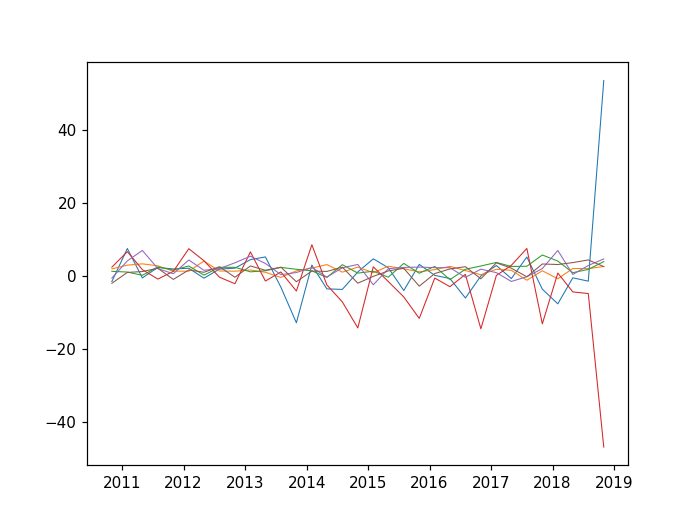

/home/earthwave/miniconda3/envs/dev/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [51]:
%matplotlib notebook
count = 0
for idx, line in dfStats.iterrows():
    if line['statistics.afterGlacierMask'] > 10000:
        dates=[datetime.fromtimestamp(x/1000) for x in line['timeseries.dates']]
        plt.plot(dates , line['timeseries.averages'], linewidth=0.7)
        count=count+1
        if count >5:
            break

<IPython.core.display.Javascript object>


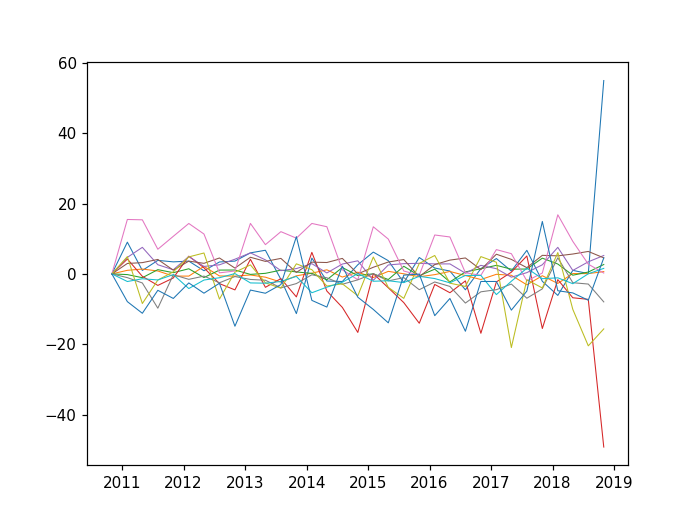

In [52]:
%matplotlib notebook
count = 0
for idx, line in dfStats.iterrows():
    if line['statistics.afterGlacierMask'] > 10000:
        dates=[datetime.fromtimestamp(x/1000) for x in line['timeseries.dates']]
        plt.plot(dates , line['timeseries.change'], linewidth=0.7)
        count=count+1
        if count >10:
            break

In [6]:
dfStats

,gridCell.minX,gridCell.minY,gridCell.size,statistics.DebrisMaskArea,statistics.GlacierMaskArea,statistics.afterGlacierMask,statistics.meanElevationDifference,statistics.pointsWithinDebrisMask,statistics.result_avgX,statistics.result_avgY,...,statistics.result_refDifference_2015,statistics.result_refDifference_2016,statistics.result_refDifference_2017,statistics.result_refDifference_2018,statistics.result_refDifference_2019,statistics.result_total,statistics.tdx2_filtered,timeseries.dates,timeseries.averages,timeseries.change
0,-1600000,-100000,100000,0.863542,3.401935,106,-22.422802,67,-1.536373e+06,-21292.235597,...,-9.820787,-11.176451,-21.182444,-5.338712,-7.113104,106,127713,"[1288569600000, 1296518400000, 1304208000000, ...","[-15.5730685004, None, None, -28.4195211863, N...","[0.0, None, None, -12.8464526859, None, -16.05..."
1,-1500000,0,100000,0.216172,0.749176,6,-10.264159,0,-1.443186e+06,29895.766148,...,0.000000,0.000000,0.000000,0.000000,0.000000,6,81982,None,None,None
10,-1300000,400000,100000,113.223700,763.736827,16273,1.328567,1309,-1.242920e+06,474015.922569,...,2.823914,-1.546524,2.363816,4.650114,1.712152,16273,65253,"[1288569600000, 1296518400000, 1304208000000, ...","[-1.5235448158, 7.4916196863, -0.5407904139, 2...","[0.0, 9.0151645021, 0.9827544019000001, 3.8425..."
100,-400000,-200000,100000,3.907300,421.236628,103177,1.877892,29,-3.686860e+05,-177986.911206,...,2.202802,1.913441,0.886485,1.587585,4.430511,103177,1674721,"[1288569600000, 1296518400000, 1304208000000, ...","[1.9220945659000002, 2.9404649956, 3.300772734...","[0.0, 1.0183704297, 1.3786781686, 0.8327999865..."
101,-400000,-100000,100000,15.451214,2825.096403,266305,1.767278,321,-3.451153e+05,-67874.002341,...,1.158623,0.830155,2.792208,2.969470,2.692430,266305,856372,"[1288569600000, 1296518400000, 1304208000000, ...","[1.2526452939000001, 1.0585223397, 0.174928765...","[0.0, -0.1941229542, -1.0777165282, 1.21304509..."
102,-400000,0,100000,18.586732,238.207789,1546,-8.411553,600,-3.473474e+05,4680.470017,...,-5.863046,-12.226695,-4.622612,-21.976929,0.000000,1546,2481210,"[1288569600000, 1296518400000, 1304208000000, ...","[-49.5481425307, None, -4.8773729139, -9.47249...","[0.0, None, 44.6707696168, 40.0756434252, None..."
103,-400000,600000,100000,178.219554,1221.480705,4992,-4.560238,1911,-3.748540e+05,673306.807539,...,-4.187657,-4.087317,-4.461952,-9.904778,-23.926737,4992,2480143,"[1288569600000, 1296518400000, 1304208000000, ...","[-5.2594377389, -2.8053461241, 0.8600853413, -...","[0.0, 2.4540916148000003, 6.1195230801, 0.3386..."
104,-300000,-900000,100000,1.621181,2.184455,5,23.473287,5,-2.288295e+05,-804639.821777,...,0.000000,0.000000,23.473287,0.000000,0.000000,5,200505,None,None,None
105,-300000,-800000,100000,60.285411,303.781711,6071,3.061129,524,-2.222510e+05,-740667.113561,...,-0.276987,1.534470,6.172784,6.635390,11.132867,6071,53031,"[1288569600000, 1296518400000, 1304208000000, ...","[-0.0111064655, 17.1355012246, 8.4179375731, 8...","[0.0, 17.1466076901, 8.4290440386, 8.498022271..."
106,-300000,-700000,100000,68.111307,545.052121,15157,0.223896,515,-2.538972e+05,-667298.864248,...,-0.508262,-3.193507,2.530759,-5.141891,-8.133365,15157,833411,"[1288569600000, 1296518400000, 1304208000000, ...","[2.4070943499, 6.6326534024, 1.7199179948, -0....","[0.0, 4.2255590525, -0.6871763551000001, -3.26..."


<IPython.core.display.Javascript object>


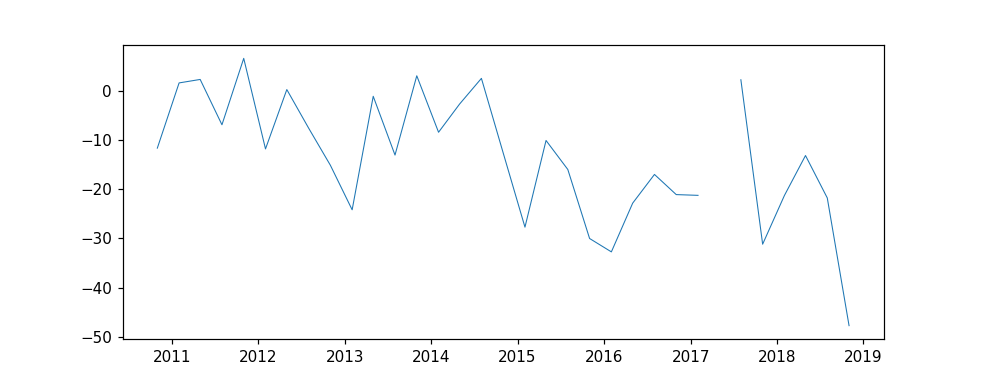

In [88]:
%matplotlib notebook
plt.figure(figsize=(9,3.5))
# gridcell yellow with 1678 observations
# row=dfStats.loc[(dfStats['gridCell.minX']==-800000) & (dfStats['gridCell.minY']==-500000)]
# gridcell with 136
# row=dfStats.loc[(dfStats['gridCell.minX']==-1600000) & (dfStats['gridCell.minY']==-100000)]
# gridcell heavily negative with 4497
row=dfStats.loc[(dfStats['gridCell.minX']==1100000) & (dfStats['gridCell.minY']==-800000)]
# with 8000 points
# row=dfStats.loc[(dfStats['gridCell.minX']==-900000) & (dfStats['gridCell.minY']==-200000)]
# 
# row=dfStats.loc[(dfStats['gridCell.minX']==1100000) & (dfStats['gridCell.minY']==-800000)]
# 80'000 gridcell
#row=dfStats.loc[(dfStats['gridCell.minX']==500000) & (dfStats['gridCell.minY']==0)]
### 
dates=[datetime.fromtimestamp(x/1000) for x in row.iloc[0]['timeseries.dates']]
plt.plot(dates , row.iloc[0]['timeseries.averages'], linewidth=0.7)

In [97]:
row=dfStats.loc[(dfStats['gridCell.minX']==500000) & (dfStats['gridCell.minY']==0)]
print(row.iloc[0])

gridCell.minX                                                                      500000
gridCell.minY                                                                           0
gridCell.size                                                                      100000
statistics.DebrisMaskArea                                                         9.36234
statistics.GlacierMaskArea                                                        762.097
statistics.afterGlacierMask                                                         84381
statistics.meanElevationDifference                                               -5.87144
statistics.pointsWithinDebrisMask                                                     395
statistics.result_avgX                                                             525801
statistics.result_avgY                                                            27433.6
statistics.result_count_2010                                                         1077
statistics

In [94]:
dfStats.columns

Index(['gridCell.minX', 'gridCell.minY', 'gridCell.size',
       'statistics.DebrisMaskArea', 'statistics.GlacierMaskArea',
       'statistics.afterGlacierMask', 'statistics.meanElevationDifference',
       'statistics.pointsWithinDebrisMask', 'statistics.result_avgX',
       'statistics.result_avgY', 'statistics.result_count_2010',
       'statistics.result_count_2011', 'statistics.result_count_2012',
       'statistics.result_count_2013', 'statistics.result_count_2014',
       'statistics.result_count_2015', 'statistics.result_count_2016',
       'statistics.result_count_2017', 'statistics.result_count_2018',
       'statistics.result_count_2019', 'statistics.result_offsetX',
       'statistics.result_offsetY', 'statistics.result_refDifference_2010',
       'statistics.result_refDifference_2011',
       'statistics.result_refDifference_2012',
       'statistics.result_refDifference_2013',
       'statistics.result_refDifference_2014',
       'statistics.result_refDifference_2015',
  

<IPython.core.display.Javascript object>


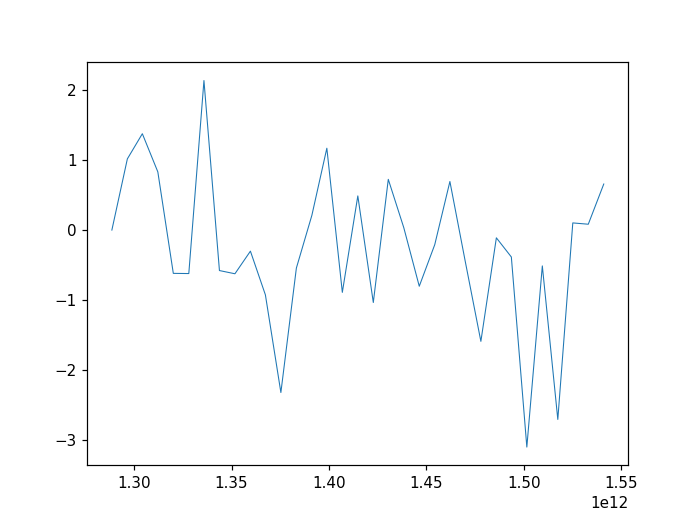

In [59]:
%matplotlib notebook

plt.plot(dfStats.iloc[3]['timeseries.dates'] , dfStats.iloc[3]['timeseries.change'], linewidth=0.7)